In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
df=pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Smoking,BMI,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,Yes,16.60,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,No,20.34,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,Yes,26.58,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,No,24.21,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,No,23.71,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,Yes,24.21,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,No,22.60,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,No,25.06,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,Yes,25.82,1


**data** **cleaning**:

In [3]:
df["Smoking"] = df["Smoking"].map({"Yes": 1, "No": 0})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Smoking,BMI,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,1,16.60,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,20.34,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,1,26.58,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,24.21,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,23.71,0


In [4]:
df=df.rename(columns={'sex':'gender','cp':'chest pain type','trestbps':'blood pressure','chol':'cholestoral','fbs':'blood sugar','restecg':'electrocardiographic','thalach':'maximum heart rate','exang':'exercise induced','oldpeak':'ST depression','ca':'num of major vessels','thal':'thalassemia','BMI':'Body math'},inplace= False)
#we rename the name of some columns to be clear enough.

In [5]:
df

,age,gender,chest pain type,blood pressure,cholestoral,blood sugar,electrocardiographic,maximum heart rate,exercise induced,ST depression,slope,num of major vessels,thalassemia,Smoking,Body math,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,1,16.60,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,20.34,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,1,26.58,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,24.21,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,23.71,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,24.21,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,22.60,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,25.06,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,25.82,1


In [6]:
df.duplicated().value_counts() #

False    1022
True        3
dtype: int64

In [7]:
df = df.drop_duplicates()  # we just drope the duplicates values in the datasets.
df.shape

(1022, 16)

In [8]:
df=df.drop(['exercise induced','num of major vessels'],axis=1)  # drope unnecessary columns on dataset because it don,t affect the result.

In [9]:
df

,age,gender,chest pain type,blood pressure,cholestoral,blood sugar,electrocardiographic,maximum heart rate,ST depression,slope,thalassemia,Smoking,Body math,target
0,52,1,0,125,212,0,1,168,1.0,2,3,1,16.60,0
1,53,1,0,140,203,1,0,155,3.1,0,3,0,20.34,0
2,70,1,0,145,174,0,1,125,2.6,0,3,1,26.58,0
3,61,1,0,148,203,0,1,161,0.0,2,3,0,24.21,0
4,62,0,0,138,294,1,1,106,1.9,1,2,0,23.71,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,0.0,2,2,1,24.21,1
1021,60,1,0,125,258,0,0,141,2.8,1,3,0,22.60,0
1022,47,1,0,110,275,0,0,118,1.0,1,2,0,25.06,0
1023,50,0,0,110,254,0,0,159,0.0,2,2,1,25.82,1


<Figure size 1000x1000 with 0 Axes>

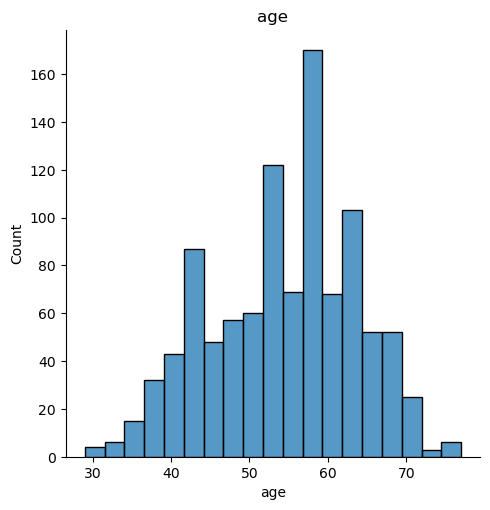

<Figure size 1000x1000 with 0 Axes>

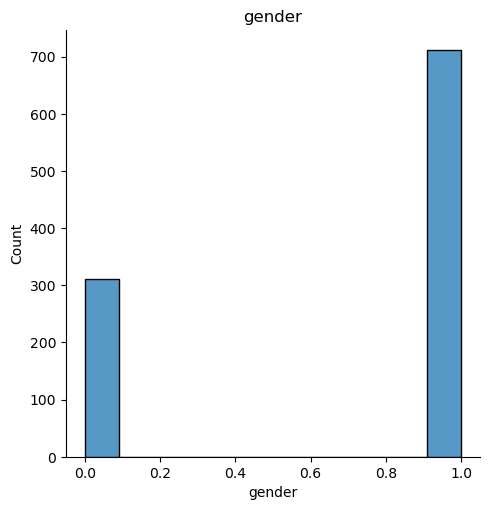

<Figure size 1000x1000 with 0 Axes>

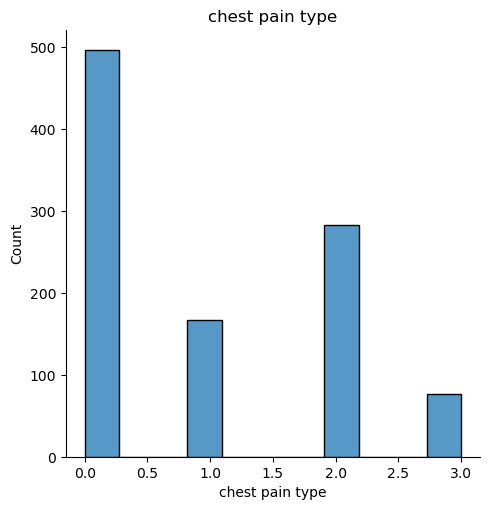

<Figure size 1000x1000 with 0 Axes>

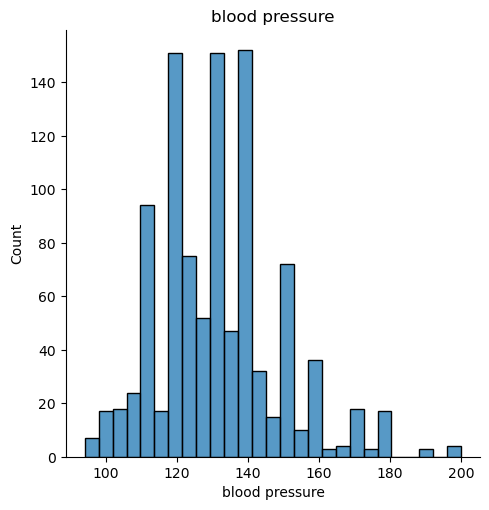

<Figure size 1000x1000 with 0 Axes>

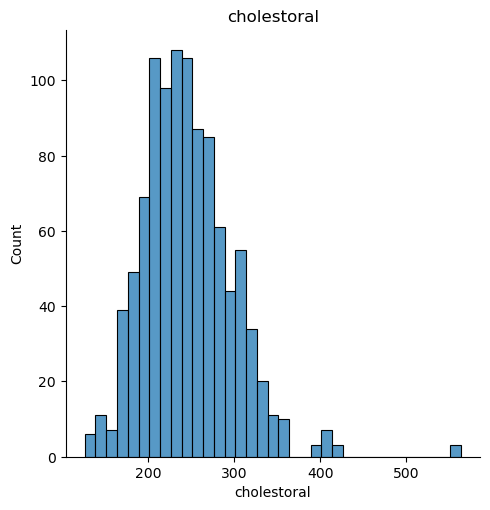

<Figure size 1000x1000 with 0 Axes>

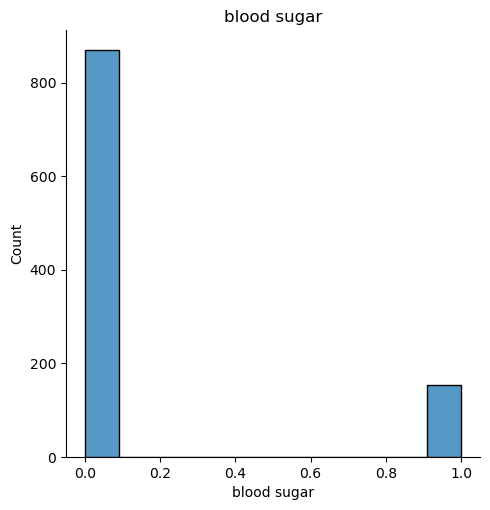

<Figure size 1000x1000 with 0 Axes>

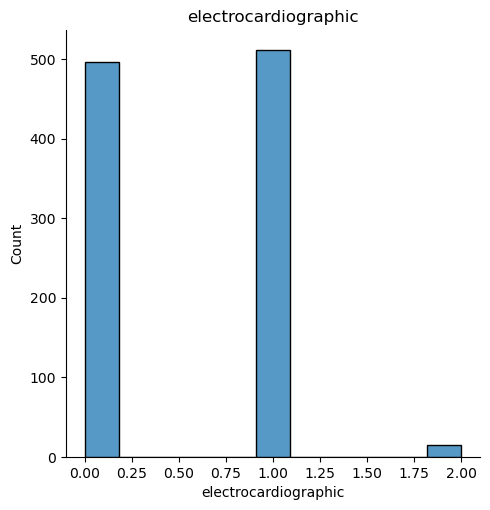

<Figure size 1000x1000 with 0 Axes>

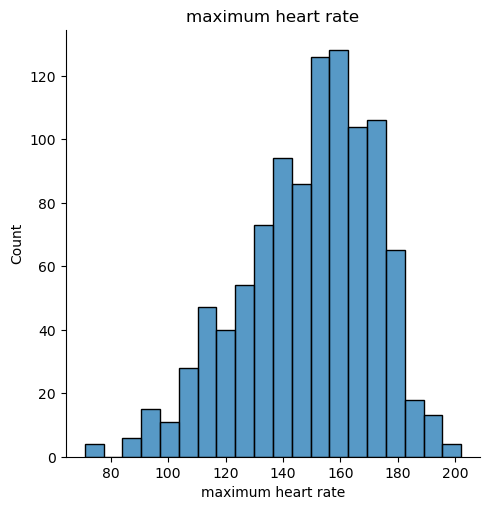

<Figure size 1000x1000 with 0 Axes>

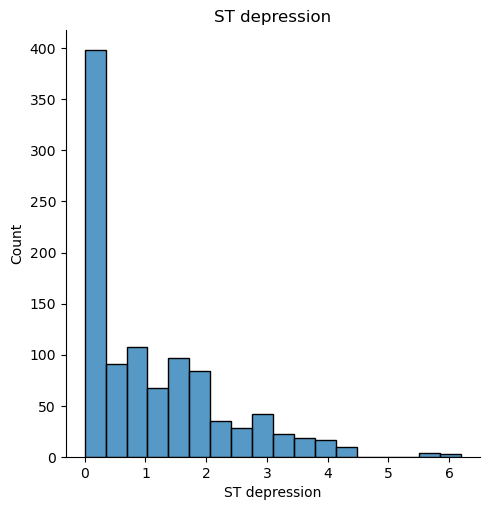

<Figure size 1000x1000 with 0 Axes>

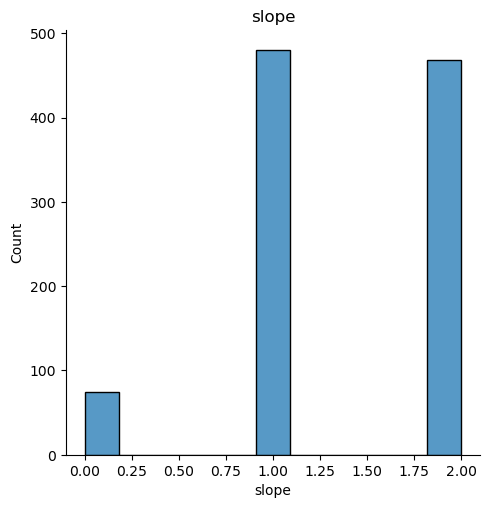

<Figure size 1000x1000 with 0 Axes>

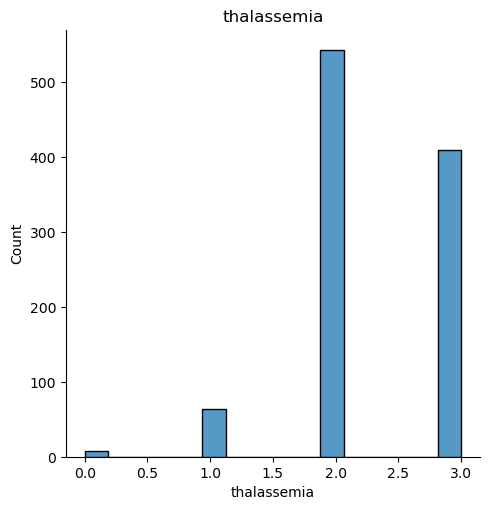

<Figure size 1000x1000 with 0 Axes>

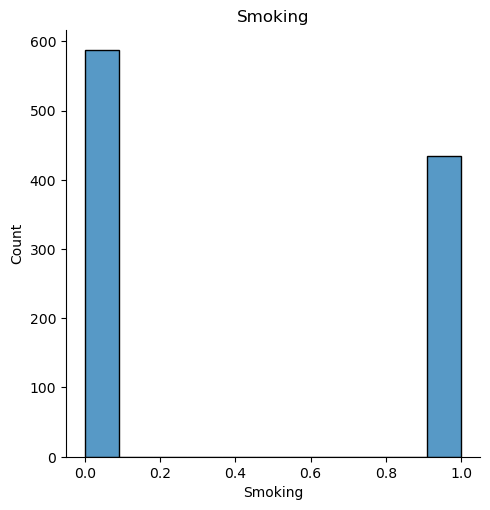

<Figure size 1000x1000 with 0 Axes>

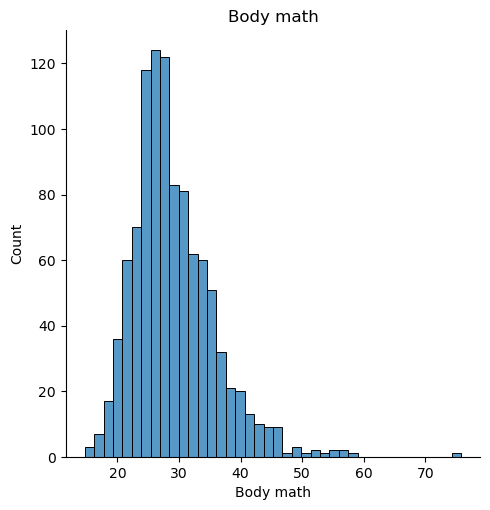

<Figure size 1000x1000 with 0 Axes>

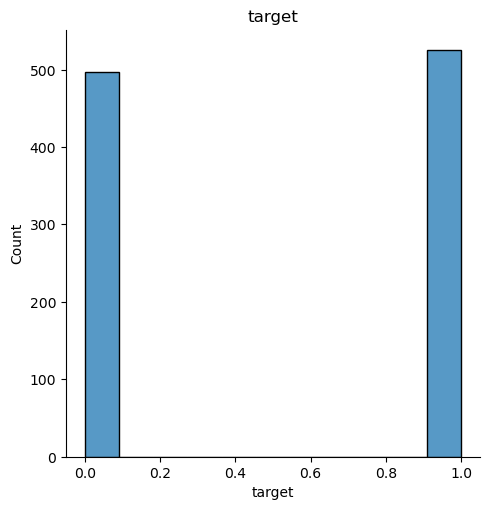

In [10]:
for f in df:
     plt.figure(figsize = (10,10))
     sns.displot(df[f])
     plt.title(f)
     plt.show();

In [11]:
def rem_outlier(df, feature):
    lower_bound = df[feature].mean() - 3*df[feature].std()
    upper_bound = df[feature].mean() + 3*df[feature].std()
    
    df.loc[df[feature] < lower_bound , feature] = lower_bound
    df.loc[df[feature] > upper_bound, feature] = upper_bound
   # creating function to remove columns that have outliers values.

In [12]:
for f in ['blood pressure', 'cholestoral','Body math']:
    rem_outlier(df, f) 

<Figure size 1000x1000 with 0 Axes>

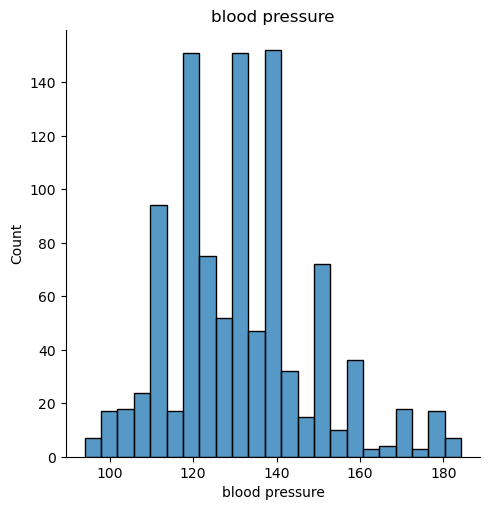

<Figure size 1000x1000 with 0 Axes>

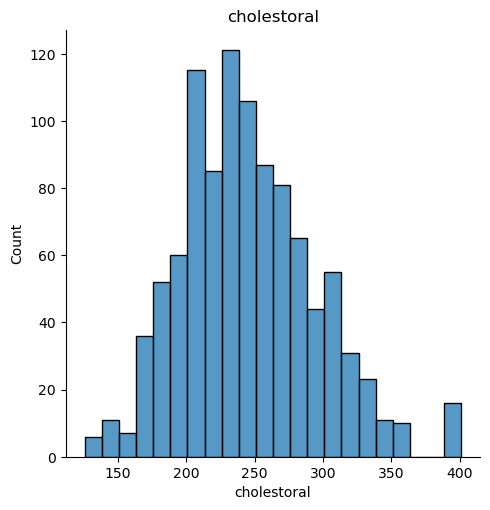

<Figure size 1000x1000 with 0 Axes>

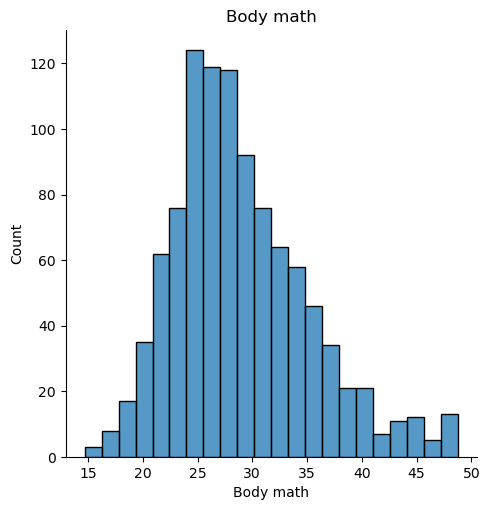

In [13]:
for f in ['blood pressure','cholestoral','Body math']:
     plt.figure(figsize = (10,10))
     sns.displot(df[f])
     plt.title(f)
     plt.show();

**data** **visualization**

In [14]:
minAge=min(df.age)
maxAge=max(df.age)
meanAge=df.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.448140900195696


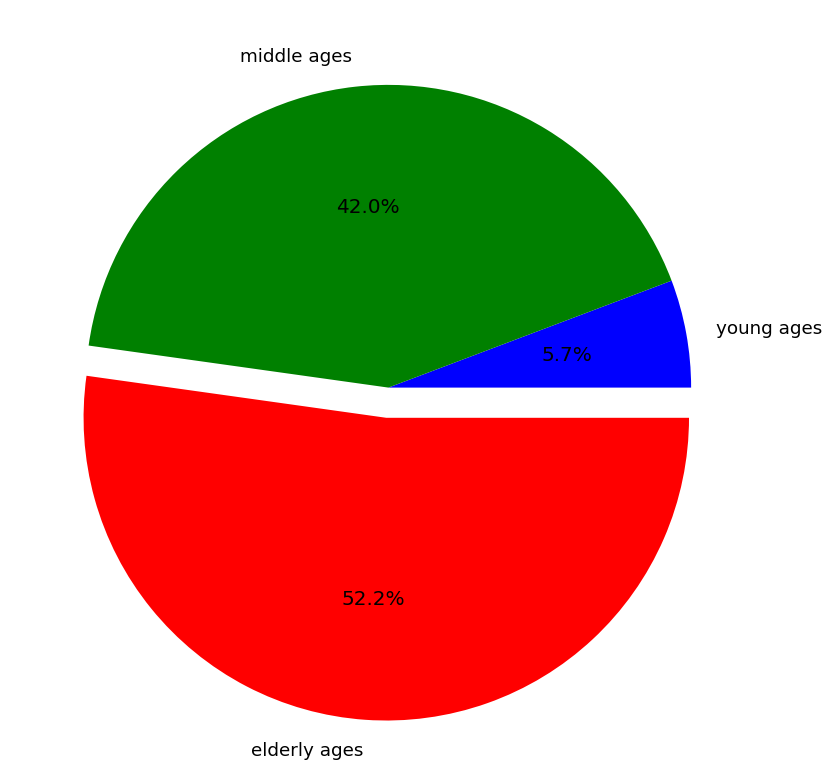

In [15]:
Young = df[(df.age>=29)&(df.age<40)]
Middle = df[(df.age>=40)&(df.age<55)]
Elder = df[(df.age>55)]

colors = ['blue','green','Red']
explode = [0,0,0.1]
plt.figure(figsize=(10,8))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

<AxesSubplot:>

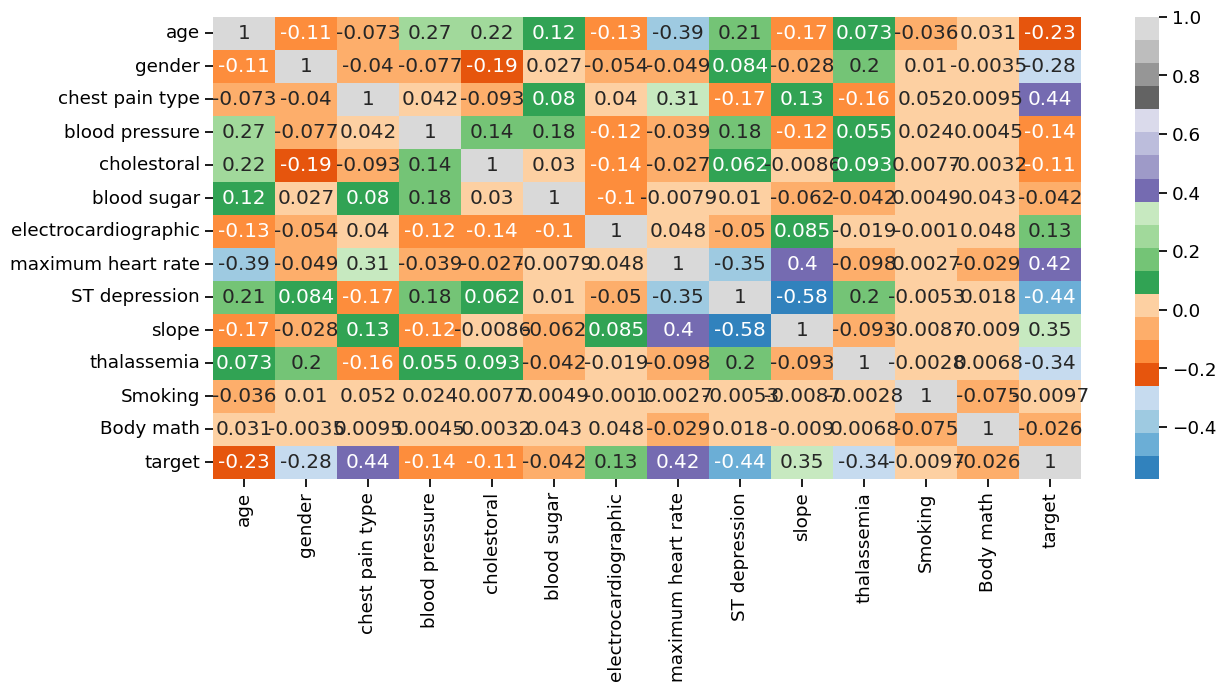

In [16]:
df.corr().style.background_gradient()
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(),annot=True,cmap='tab20c')
#Set1
#seismic
#hot
#twilight
#coolwarm
#Greens
#tab20c

**machine learning models:**

1.logistic regression:

In [17]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [18]:
from sklearn.preprocessing import MinMaxScaler # we need to normalize/scale the data to get better results
print(X)
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
print(X)

      age  gender  chest pain type  blood pressure  cholestoral  blood sugar  \
0      52       1                0           125.0        212.0            0   
1      53       1                0           140.0        203.0            1   
2      70       1                0           145.0        174.0            0   
3      61       1                0           148.0        203.0            0   
4      62       0                0           138.0        294.0            1   
...   ...     ...              ...             ...          ...          ...   
1020   59       1                1           140.0        221.0            0   
1021   60       1                0           125.0        258.0            0   
1022   47       1                0           110.0        275.0            0   
1023   50       0                0           110.0        254.0            0   
1024   54       1                0           120.0        188.0            0   

      electrocardiographic  maximum hea

In [19]:
Y=Y.values.reshape(-1,1)
Y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int64)

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25,shuffle=True,random_state=1) # split data into train and test.

In [21]:
regression=LogisticRegression(max_iter=2000,C=0.9) # we can select the maximum number of epochs / iterations ...try setting it to 10/20/30
regression.fit(X_train,Y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.9, max_iter=2000)

In [22]:
print("regression train score is :",regression.score(X_train,Y_train))  # print the model score train
print("regression test score is :",regression.score(X_test,Y_test))     # print the model score test
print("regression classes are :",regression.classes_)                    # print the model num of classes.
print("regression num of iteration are :",regression.n_iter_)

regression train score is : 0.825065274151436
regression test score is : 0.83984375
regression classes are : [0 1]
regression num of iteration are : [35]


In [23]:
y_pred=regression.predict(X_test)     # predict the test values.
print("predicted value:\n",y_pred)    # print the predicted value.
print("actual value:\n",Y_test.flatten())    #print the actual value.
Y_test.shape  # print the test shape.

predicted value:
 [0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1
 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0
 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1
 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1
 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1
 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0]
actual value:
 [0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1
 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0
 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1
 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1
 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1
 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0

(256, 1)

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test,y_pred))
print(mean_absolute_error(Y_test,y_pred))

0.16015625
0.16015625


In [25]:
cm=confusion_matrix(Y_test,y_pred)  
print("confusion matrix: \n",cm)  # print the confusion matrix value.

confusion matrix: 
 [[ 98  29]
 [ 12 117]]


In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('accuracy:',accuracy_score(Y_test,y_pred)) #print the accuracy of the model.
print('f1 score',f1_score(Y_test,y_pred))        #print the loss for the model.
print('precision',precision_score(Y_test,y_pred)) # print the precision score for model.
print('recall:',recall_score(Y_test,y_pred))      # print the recall score for the model.

accuracy: 0.83984375
f1 score 0.850909090909091
precision 0.8013698630136986
recall: 0.9069767441860465


In [27]:
from sklearn.metrics import classification_report
#Check precision, recall, f1-score
print(classification_report(Y_test,y_pred)) # print the values of presicion and recall and fi_score.

              precision    recall  f1-score   support

           0       0.89      0.77      0.83       127
           1       0.80      0.91      0.85       129

    accuracy                           0.84       256
   macro avg       0.85      0.84      0.84       256
weighted avg       0.85      0.84      0.84       256



[[ 98  29]
 [ 12 117]]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


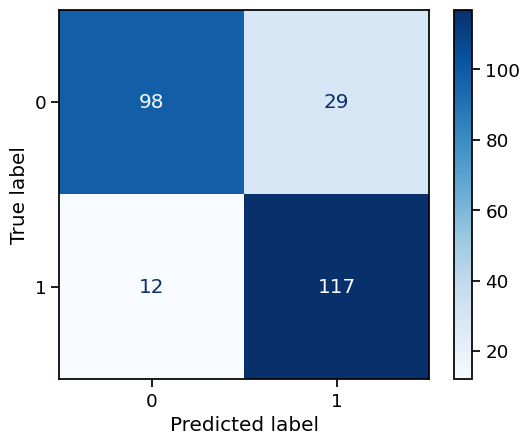

<Figure size 900x900 with 0 Axes>

In [28]:
dat = plot_confusion_matrix(regression, X_test, Y_test,cmap=plt.cm.Blues)
plt.figure(figsize=(9,9))
print(dat.confusion_matrix)  # print  the value of the confusion matrix

plt.show();    #

2. **Naive Bayes**

In [29]:
from sklearn.naive_bayes import GaussianNB # import GaussianNB A Gaussian Naive Bayes algorithm is a special type of NB algorithm.It's specifically used when the features have continuous values. It's also assumed that all the features are following a gaussian distribution i.e, normal distribution
model= GaussianNB()
model.fit(X_train,Y_train) # training x,y 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [30]:
print(" train score is :",model.score(X_train,Y_train))  # print the model score train
print(" test score is :",model.score(X_test,Y_test))     # print the model score test
print(" classes are :",model.classes_)                    # print the model num of classes.
#print("regression num of iteration are :",model.n_iter_)             # print the num of iteration .

 train score is : 0.8237597911227154
 test score is : 0.83203125
 classes are : [0 1]


In [31]:
Y_pred=regression.predict(X_test)     # predict the test values.
print("predicted value:\n",Y_pred)    # print the predicted value.
print("actual value:\n",Y_test.flatten())    #print the actual value .
Y_test.shape  # print the test shape.

predicted value:
 [0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1
 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0
 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1
 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1
 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1
 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0]
actual value:
 [0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1
 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0
 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1
 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1
 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1
 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0

(256, 1)

In [32]:
cm=confusion_matrix(Y_test,Y_pred)  
print("confusion matrix: \n",cm)  # print the confusion matrix value.

confusion matrix: 
 [[ 98  29]
 [ 12 117]]


In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('accuracy:',accuracy_score(Y_test,Y_pred)) #print the accuracy of the model.
print('f1 score',f1_score(Y_test,Y_pred))        #print the loss for the model.
print('precision',precision_score(Y_test,Y_pred)) # print the precision score for model.
print('recall:',recall_score(Y_test,Y_pred))      # print the recall score for the model.

accuracy: 0.83984375
f1 score 0.850909090909091
precision 0.8013698630136986
recall: 0.9069767441860465


In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test,Y_pred))
print(mean_absolute_error(Y_test,Y_pred))

0.16015625
0.16015625


In [35]:
from sklearn.metrics import classification_report
#Check precision, recall, f1-score
print(classification_report(Y_test,Y_pred)) # print the values of presicion and recall and fi_score.

              precision    recall  f1-score   support

           0       0.89      0.77      0.83       127
           1       0.80      0.91      0.85       129

    accuracy                           0.84       256
   macro avg       0.85      0.84      0.84       256
weighted avg       0.85      0.84      0.84       256



C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[103  24]
 [ 19 110]]


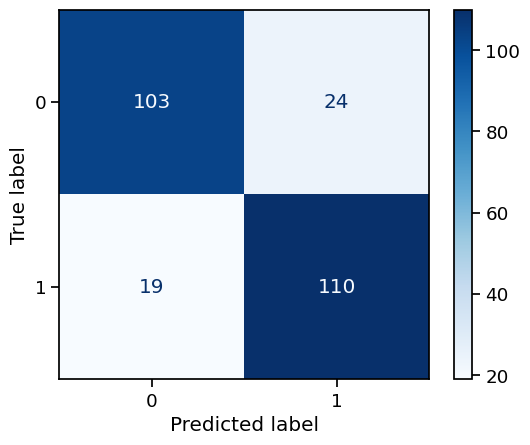

<Figure size 900x900 with 0 Axes>

In [36]:
dat = plot_confusion_matrix(model, X_test, Y_test,cmap=plt.cm.Blues)
plt.figure(figsize=(9,9))
print(dat.confusion_matrix)  # print  the value of the confusion matrix

plt.show();    #

3.**SVC**

In [37]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(X_train,Y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=0)

In [38]:
print(" train score is :",classifier.score(X_train,Y_train))  # print the model score train
print(" test score is :",classifier.score(X_test,Y_test))     # print the model score test

 train score is : 0.835509138381201
 test score is : 0.83203125


In [39]:
y_preds=classifier.predict(X_test)
print("predicted value:\n",y_preds)    # print the predicted value.
print("actual value:\n",Y_test.flatten())    #print the actual value .
Y_test.shape  # print the test shape.

predicted value:
 [0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0
 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1
 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1
 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1
 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0]
actual value:
 [0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1
 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0
 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1
 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1
 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1
 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0

(256, 1)

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test,y_preds))
print(mean_absolute_error(Y_test,y_preds))

0.16796875
0.16796875


In [41]:
cm=confusion_matrix(Y_test,y_preds)  
print("confusion matrix: \n",cm)  # print the confusion matrix value.

confusion matrix: 
 [[ 96  31]
 [ 12 117]]


In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('accuracy:',accuracy_score(Y_test,y_preds)) #print the accuracy of the model.
print('f1 score',f1_score(Y_test,y_preds))        #print the loss for the model.
print('precision',precision_score(Y_test,y_preds)) # print the precision score for model.
print('recall:',recall_score(Y_test,y_preds))      # print the recall score for the model.

accuracy: 0.83203125
f1 score 0.8447653429602887
precision 0.7905405405405406
recall: 0.9069767441860465


In [43]:
from sklearn.metrics import classification_report
#Check precision, recall, f1-score
print(classification_report(Y_test,y_preds)) # print the values of presicion and recall and fi_score.

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       127
           1       0.79      0.91      0.84       129

    accuracy                           0.83       256
   macro avg       0.84      0.83      0.83       256
weighted avg       0.84      0.83      0.83       256



[[ 96  31]
 [ 12 117]]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


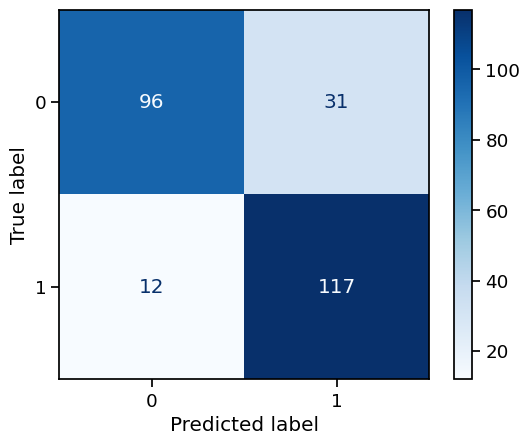

<Figure size 900x900 with 0 Axes>

In [44]:
dat = plot_confusion_matrix(classifier, X_test, Y_test,cmap=plt.cm.Blues)
plt.figure(figsize=(9,9))
print(dat.confusion_matrix)  # print  the value of the confusion matrix

plt.show();    

4.**KNN**

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =20)
knn.fit(X_train,Y_train)
#print(knn.score(X_test, Y_test))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=20)

In [46]:
print(" train score is :",knn.score(X_train,Y_train))  # print the model score train
print(" test score is :",knn.score(X_test,Y_test))     # print the model score test

 train score is : 0.8511749347258486
 test score is : 0.828125


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

In [47]:
y_predict=knn.predict(X_test)
print("predicted value:\n",y_predict)    # print the predicted value.
print("actual value:\n",Y_test.flatten())    #print the actual value .
Y_test.shape  # print the test shape.

predicted value:
 [0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1
 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0
 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0
 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1
 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1
 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0]
actual value:
 [0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1
 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0
 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1
 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1
 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1
 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


(256, 1)

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test,y_predict))
print(mean_absolute_error(Y_test,y_predict))

0.171875
0.171875


In [49]:
cm=confusion_matrix(Y_test,y_predict)  
print("confusion matrix: \n",cm)  # print the confusion matrix value.

confusion matrix: 
 [[101  26]
 [ 18 111]]


In [50]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('accuracy:',accuracy_score(Y_test,y_predict)) #print the accuracy of the model.
print('f1 score',f1_score(Y_test,y_predict))        #print the loss for the model.
print('precision',precision_score(Y_test,y_predict)) # print the precision score for model.
print('recall:',recall_score(Y_test,y_predict))      # print the recall score for the model.

accuracy: 0.828125
f1 score 0.8345864661654135
precision 0.8102189781021898
recall: 0.8604651162790697


In [51]:
from sklearn.metrics import classification_report
#Check precision, recall, f1-score
print(classification_report(Y_test,y_predict)) # print the values of presicion and recall and fi_score.

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       127
           1       0.81      0.86      0.83       129

    accuracy                           0.83       256
   macro avg       0.83      0.83      0.83       256
weighted avg       0.83      0.83      0.83       256



In [52]:
from sklearn import metrics
scores_List=[]
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors =k)
    knn.fit(X_train,Y_train)
    #print(knn)
    y_pred=knn.predict(X_test)
    scores_List.append(metrics.accuracy_score(Y_test,y_predict))
    print(scores_List)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

[0.828125]
[0.828125, 0.828125]
[0.828125, 0.828125, 0.828125]
[0.828125, 0.828125, 0.828125, 0.828125]
[0.828125, 0.828125, 0.828125, 0.828125, 0.828125]
[0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

[0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typical

[0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125]
[0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125]
[0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125]
[0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125]
[0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125]
[0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

[0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typical

[0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125]
[0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125]
[0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125]
[0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125]
[0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125, 0.828125]


Text(0, 0.5, 'accuracy')

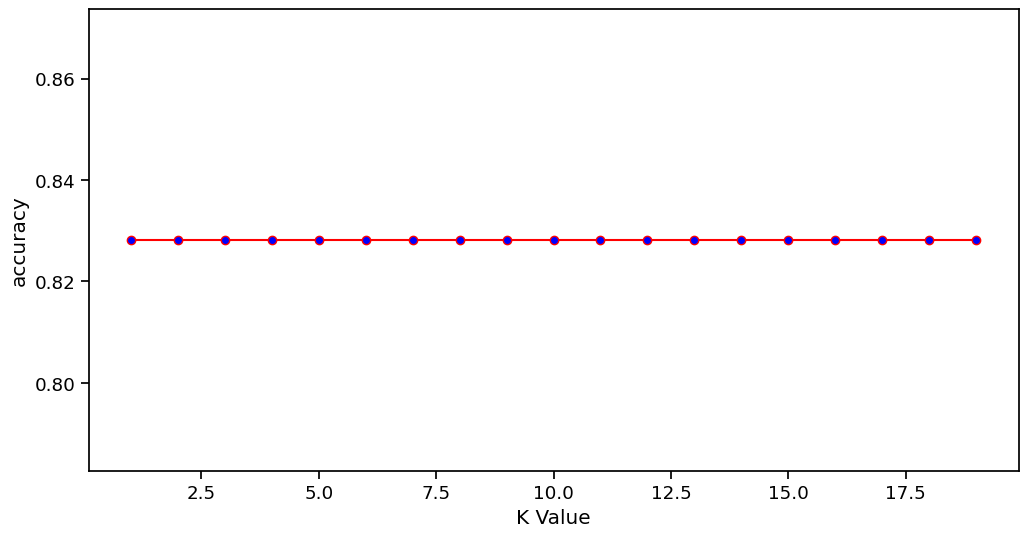

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20),scores_List, color='red',marker='o', markerfacecolor='blue')
plt.xlabel('K Value')
plt.ylabel('accuracy')

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[ 96  31]
 [ 15 114]]


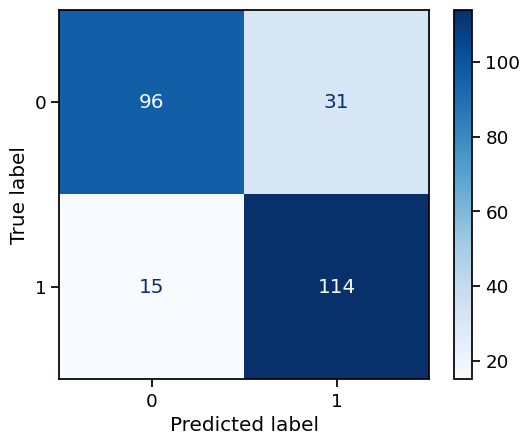

<Figure size 900x900 with 0 Axes>

In [54]:
dat = plot_confusion_matrix(knn, X_test, Y_test,cmap=plt.cm.Blues)
plt.figure(figsize=(9,9))
print(dat.confusion_matrix)  # print  the value of the confusion matrix

plt.show(); 

5.**Decision** **tree**.

In [55]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
test = DecisionTreeClassifier()
test = test.fit(X_train,Y_train)


In [56]:
print("regression train score is :",test.score(X_train,Y_train))  # print the model score train
print("regression test score is :",test.score(X_test,Y_test))     # print the model score test

regression train score is : 1.0
regression test score is : 0.98046875


In [57]:
y_prediction=test.predict(X_test)
print("predicted value:\n",y_prediction)    # print the predicted value.
print("actual value:\n",Y_test.flatten())    #print the actual value .
Y_test.shape  # print the test shape.

predicted value:
 [0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1
 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0
 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1
 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1
 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1
 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0]
actual value:
 [0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1
 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0
 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1
 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1
 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1
 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0

(256, 1)

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test,y_prediction))
print(mean_absolute_error(Y_test,y_prediction))

0.01953125
0.01953125


In [59]:
cm=confusion_matrix(Y_test,y_prediction)  
print("confusion matrix: \n",cm)  # print the confusion matrix value.

confusion matrix: 
 [[123   4]
 [  1 128]]


In [60]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('accuracy:',accuracy_score(Y_test,y_prediction)) #print the accuracy of the model.
print('f1 score',f1_score(Y_test,y_prediction))        #print the loss for the model.
print('precision',precision_score(Y_test,y_prediction)) # print the precision score for model.
print('recall:',recall_score(Y_test,y_prediction))      # print the recall score for the model.

accuracy: 0.98046875
f1 score 0.9808429118773947
precision 0.9696969696969697
recall: 0.9922480620155039


In [61]:
from sklearn.metrics import classification_report
#Check precision, recall, f1-score
print(classification_report(Y_test,y_prediction)) # print the values of presicion and recall and fi_score.

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       127
           1       0.97      0.99      0.98       129

    accuracy                           0.98       256
   macro avg       0.98      0.98      0.98       256
weighted avg       0.98      0.98      0.98       256



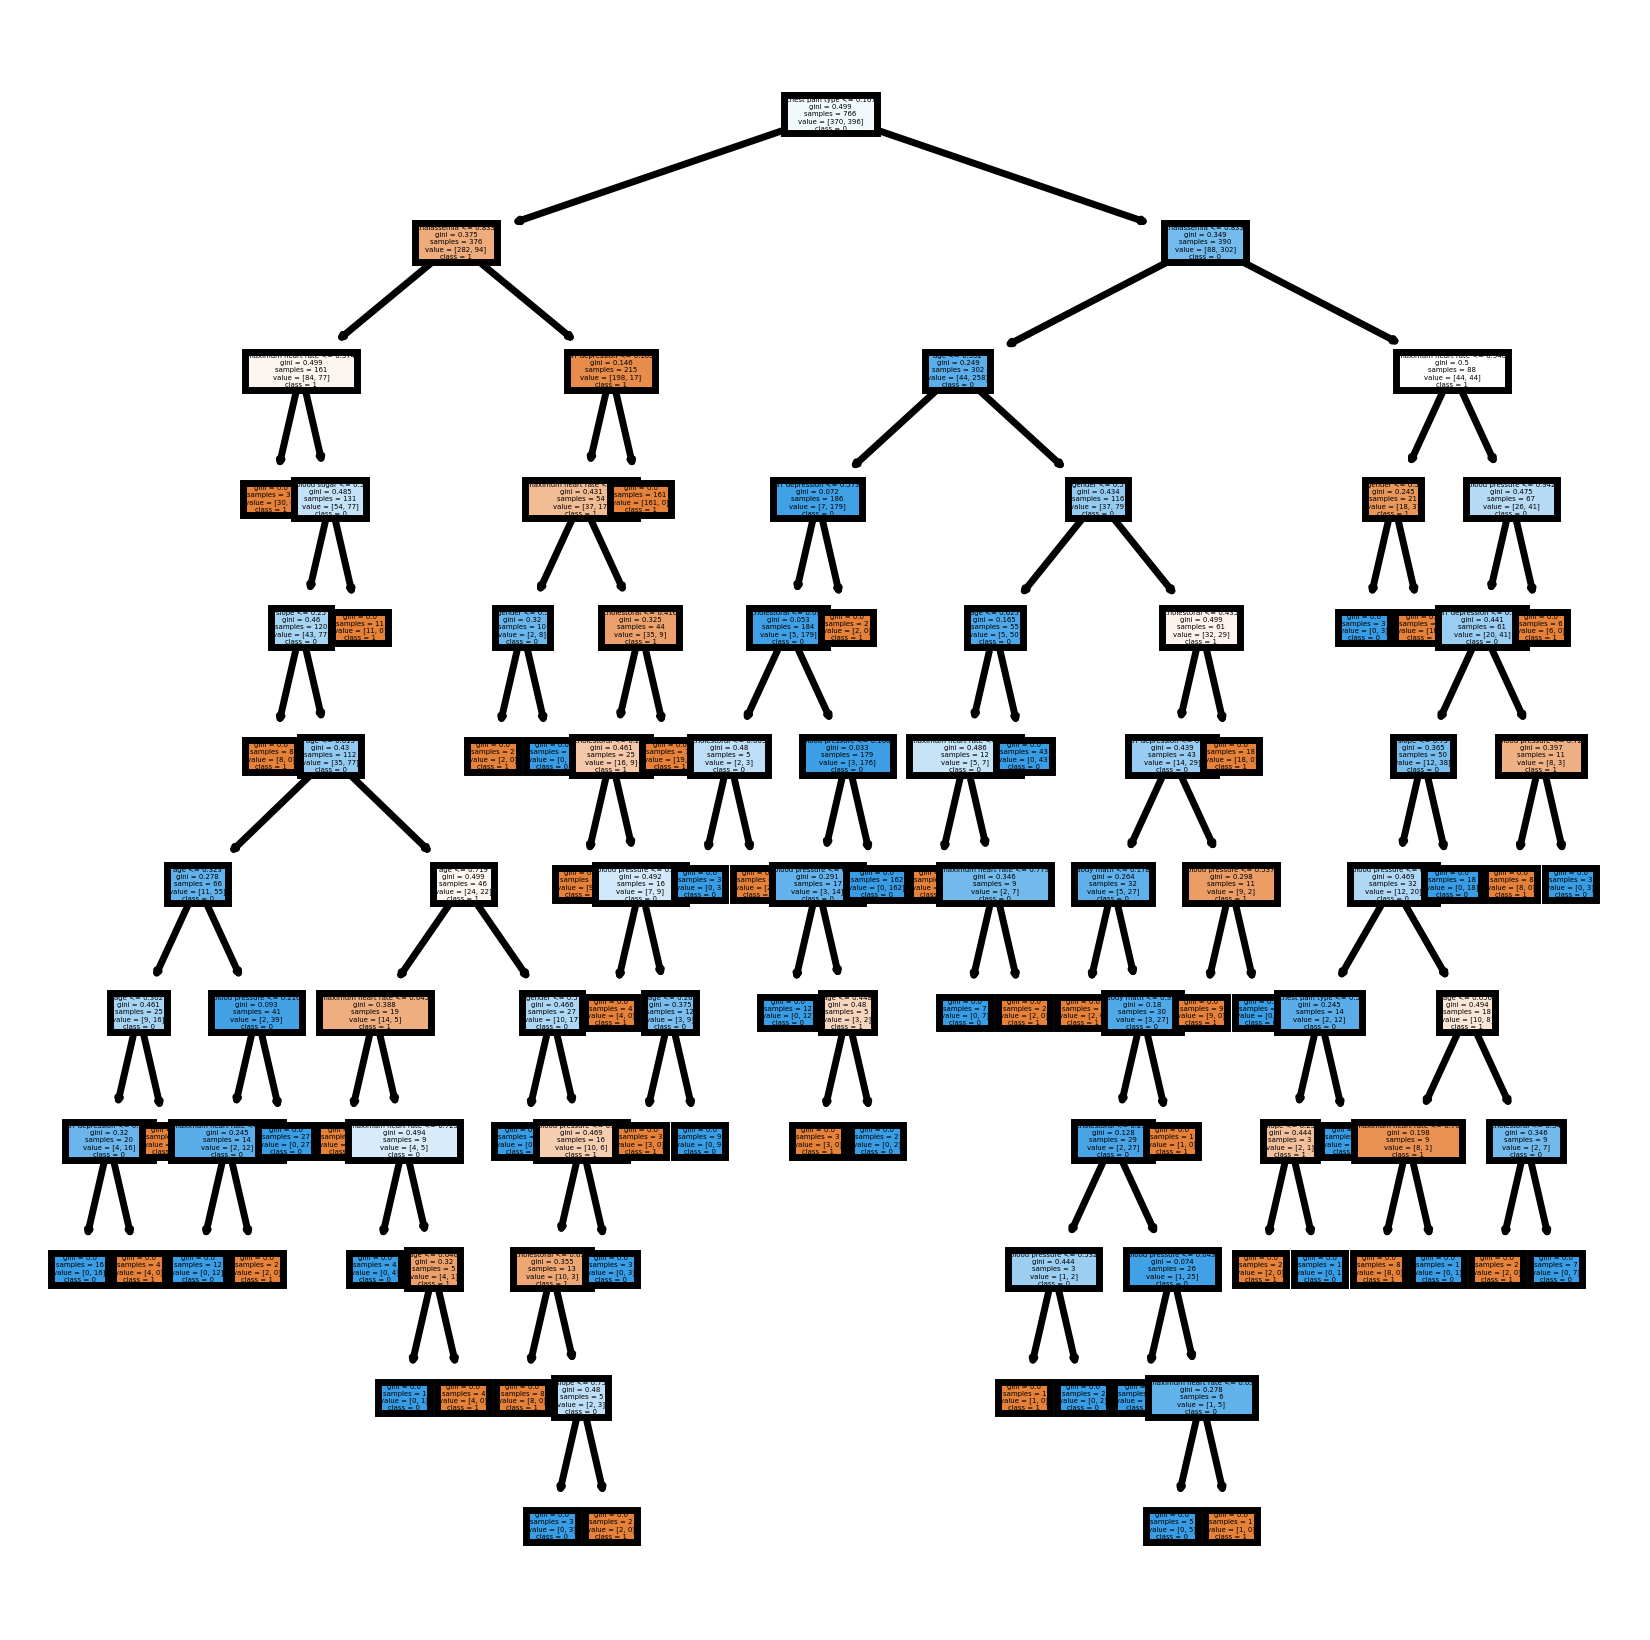

In [62]:
from sklearn import tree
import matplotlib.pyplot as plt
columns=['age','gender','chest pain type','blood pressure','cholestoral','blood sugar','electrocardiographic','maximum heart rate','ST depression','slope','thalassemia','Smoking','Body math']
mx=['1','0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
tree.plot_tree(test,feature_names = columns, class_names=mx,filled = True);
fig.savefig('imagename.png')

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[123   4]
 [  1 128]]


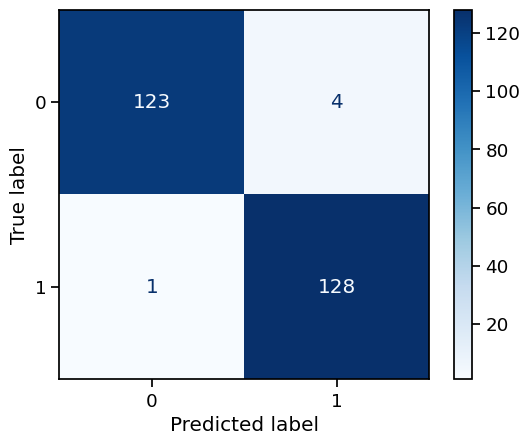

<Figure size 900x900 with 0 Axes>

In [63]:
dat = plot_confusion_matrix(test, X_test, Y_test,cmap=plt.cm.Blues)
plt.figure(figsize=(9,9))
print(dat.confusion_matrix)  # print  the value of the confusion matrix

plt.show(); 

6.**Random** **forest**

In [64]:
from sklearn.ensemble import RandomForestClassifier
tree = RandomForestClassifier(n_estimators = 100)
tree.fit(X_train,Y_train)
#y_pred = test2.predict(X_test)
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

C:\Users\hp\AppData\Local\Temp\ipykernel_14704\1810116422.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  tree.fit(X_train,Y_train)


RandomForestClassifier()

In [65]:
print("regression train score is :",tree.score(X_train,Y_train))  # print the model score train
print("regression test score is :",tree.score(X_test,Y_test))     # print the model score test

regression train score is : 1.0
regression test score is : 0.99609375


In [66]:
y_pre=tree.predict(X_test)
print("predicted value:\n",y_pre)    # print the predicted value.
print("actual value:\n",Y_test.flatten())    #print the actual value .
Y_test.shape  # print the test shape.

predicted value:
 [0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1
 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0
 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1
 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1
 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1
 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0]
actual value:
 [0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1
 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0
 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1
 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1
 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1
 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0

(256, 1)

In [67]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test,y_pre))
print(mean_absolute_error(Y_test,y_pre))

0.00390625
0.00390625


In [68]:
cm=confusion_matrix(Y_test,y_pre)  
print("confusion matrix: \n",cm)  # print the confusion matrix valu

confusion matrix: 
 [[127   0]
 [  1 128]]


In [69]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('accuracy:',accuracy_score(Y_test,y_pre)) #print the accuracy of the model.
print('f1 score',f1_score(Y_test,y_pre))        #print the loss for the model.
print('precision',precision_score(Y_test,y_pre)) # print the precision score for model.
print('recall:',recall_score(Y_test,y_pre))      # print the recall score for the model.

accuracy: 0.99609375
f1 score 0.9961089494163424
precision 1.0
recall: 0.9922480620155039


In [70]:
from sklearn.metrics import classification_report
#Check precision, recall, f1-score
print(classification_report(Y_test,y_pre)) # print the values of presicion and recall and fi_score.

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       127
           1       1.00      0.99      1.00       129

    accuracy                           1.00       256
   macro avg       1.00      1.00      1.00       256
weighted avg       1.00      1.00      1.00       256



[[127   0]
 [  1 128]]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


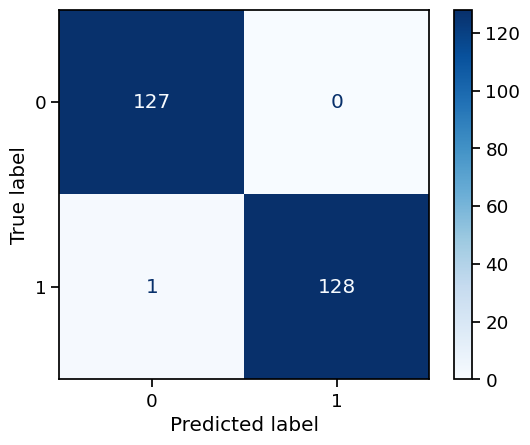

<Figure size 900x900 with 0 Axes>

In [71]:
dat = plot_confusion_matrix(tree, X_test, Y_test,cmap=plt.cm.Blues)
plt.figure(figsize=(9,9))
print(dat.confusion_matrix)  # print  the value of the confusion matrix

7-neural network

In [72]:
from sklearn.neural_network import MLPClassifier

In [73]:
MLPClassifierModel = MLPClassifier(activation='tanh',
                                   solver='lbfgs', 
                                   learning_rate='constant',
                                   early_stopping= False,
                                   alpha=0.0001 ,hidden_layer_sizes=(100, 3),random_state=33)
MLPClassifierModel.fit(X_train,Y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 3), random_state=33,
              solver='lbfgs')

In [74]:
y_predm = MLPClassifierModel.predict(X_test)

In [75]:
print("regression train score is :",MLPClassifierModel.score(X_train,Y_train))  # print the model score train
print("regression test score is :",MLPClassifierModel.score(X_test,Y_test))     # print the model score test

regression train score is : 0.8929503916449086
regression test score is : 0.85546875


In [76]:
#print('accuracy:',accuracy_score(Y_test,y_predm)) #print the accuracy of the model.

In [77]:
#y_predm=.predict(X_test)
print("predicted value:\n",y_predm)    # print the predicted value.
print("actual value:\n",Y_test.flatten())    #print the actual value .
Y_test.shape  # print the test shape.

predicted value:
 [0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1
 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0
 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1
 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1
 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1
 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1]
actual value:
 [0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1
 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0
 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1
 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1
 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1
 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0

(256, 1)

In [78]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test,y_predm))
print(mean_absolute_error(Y_test,y_predm))

0.14453125
0.14453125


In [79]:
cm=confusion_matrix(Y_test,y_predm)  
print("confusion matrix: \n",cm)  # print the confusion matrix valu

confusion matrix: 
 [[103  24]
 [ 13 116]]


In [80]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('accuracy:',accuracy_score(Y_test,y_predm)) #print the accuracy of the model.
print('f1 score',f1_score(Y_test,y_predm))        #print the loss for the model.
print('precision',precision_score(Y_test,y_predm)) # print the precision score for model.
print('recall:',recall_score(Y_test,y_predm))      # print the recall score for the model.

accuracy: 0.85546875
f1 score 0.8624535315985131
precision 0.8285714285714286
recall: 0.8992248062015504


In [81]:
from sklearn.metrics import classification_report
#Check precision, recall, f1-score
print(classification_report(Y_test,y_predm)) # print the values of presicion and recall and fi_score.

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       127
           1       0.83      0.90      0.86       129

    accuracy                           0.86       256
   macro avg       0.86      0.86      0.86       256
weighted avg       0.86      0.86      0.86       256



[[103  24]
 [ 13 116]]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


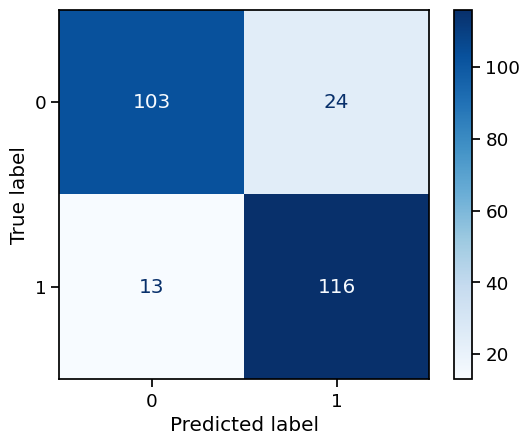

<Figure size 900x900 with 0 Axes>

In [82]:
dat = plot_confusion_matrix(MLPClassifierModel, X_test, Y_test,cmap=plt.cm.Blues)
plt.figure(figsize=(9,9))
print(dat.confusion_matrix)  # print  the value of the confusion matrix

In [83]:
data = {'train_score': [regression.score(X_train,Y_train),model.score(X_train,Y_train),classifier.score(X_train,Y_train),knn.score(X_train,Y_train),test.score(X_train,Y_train),tree.score(X_train,Y_train),MLPClassifierModel.score(X_train,Y_train)], 'test_score': [regression.score(X_test,Y_test),model.score(X_test,Y_test),classifier.score(X_test,Y_test),knn.score(X_test,Y_test),test.score(X_test,Y_test),tree.score(X_test,Y_test),MLPClassifierModel.score(X_test,Y_test)],'mean_squared_error' :[mean_squared_error(Y_test,y_pred),mean_squared_error(Y_test,Y_pred),mean_squared_error(Y_test,y_preds),mean_squared_error(Y_test,y_predict),mean_squared_error(Y_test,y_prediction),mean_squared_error(Y_test,y_pre),mean_squared_error(Y_test,y_predm)],'mean_absolute_error':[mean_absolute_error(Y_test,y_pred),mean_absolute_error(Y_test,Y_pred),mean_absolute_error(Y_test,y_preds),mean_absolute_error(Y_test,y_predict),mean_absolute_error(Y_test,y_prediction),mean_absolute_error(Y_test,y_pre),mean_absolute_error(Y_test,y_predm)],'f1_score':[f1_score(Y_test,y_pred),f1_score(Y_test,Y_pred),f1_score(Y_test,y_preds),f1_score(Y_test,y_predict),f1_score(Y_test,y_prediction),f1_score(Y_test,y_pre),f1_score(Y_test,y_predm)],'precision_score':[precision_score(Y_test,y_pred),precision_score(Y_test,Y_pred),precision_score(Y_test,y_preds),precision_score(Y_test,y_predict),f1_score(Y_test,y_prediction),f1_score(Y_test,y_pre),f1_score(Y_test,y_predm)],'recall_score':[recall_score(Y_test,y_pred),recall_score(Y_test,Y_pred),recall_score(Y_test,y_preds),recall_score(Y_test,y_predict),recall_score(Y_test,y_prediction),recall_score(Y_test,y_pre),recall_score(Y_test,y_predm)],'accuracy':[accuracy_score(Y_test,y_pred),accuracy_score(Y_test,Y_pred),accuracy_score(Y_test,y_preds),accuracy_score(Y_test,y_predict),accuracy_score(Y_test,y_prediction),accuracy_score(Y_test,y_pre),accuracy_score(Y_test,y_predm)]
        }

d= pd.DataFrame(data, index=['logistic_regression','Naive Bayes','support vector machine','KNN','Decision tree.','Random forest','Neural network'])

print(d)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

                        train_score  test_score  mean_squared_error  \
logistic_regression        0.825065    0.839844            0.179688   
Naive Bayes                0.823760    0.832031            0.160156   
support vector machine     0.835509    0.832031            0.167969   
KNN                        0.844648    0.820312            0.171875   
Decision tree.             1.000000    0.980469            0.019531   
Random forest              1.000000    0.996094            0.003906   
Neural network             0.892950    0.855469            0.144531   

                        mean_absolute_error  f1_score  precision_score  \
logistic_regression                0.179688  0.832117         0.786207   
Naive Bayes                        0.160156  0.850909         0.801370   
support vector machine             0.167969  0.844765         0.790541   
KNN                                0.171875  0.834586         0.810219   
Decision tree.                     0.019531  0.980843        

**the best performing model algorithm is Neural network.**

In [84]:
age=input('please enter your age\n')
sex=input('please enter your sex 1 for male 0 for female\n')
cp=input('please enter your score cp\n')
trestbps=input('please enter your score trestbps\n')
chol=input('please enter your score chol\n')
fbs=input('please enter your fbs 1 for yes 0 for no\n')
restreg=input('please enter your restreg your restrefg 1 for yes 0 for no\n')
thalash=input('please enter your score thalash\n')
oldpleak=input('please enter your score oldpleak\n')
slope=input('please enter your score slope\n')
thal=input('please enter your score thal\n')
smoking=input('please enter your smoking 1 for yes 0 for no\n')
bmi=input('please enter your score bmi\n')
        
features=np.array([[age,sex,cp,trestbps,chol,fbs,restreg,thalash,oldpleak,slope,thal,smoking,bmi]])
predict=MLPClassifierModel.predict(features)
if predict==0:
    print('congratulations  you are negtive ',predict)

elif predict==1:
    print('so bad  you are postive ',predict)
    

please enter your age
19
please enter your sex 1 for male 0 for female
1
please enter your score cp
1
please enter your score trestbps
13
please enter your score chol
14
please enter your fbs 1 for yes 0 for no
1
please enter your restreg your restrefg 1 for yes 0 for no
1
please enter your score thalash
1
please enter your score oldpleak
1
please enter your score slope
1
please enter your score thal
1
please enter your smoking 1 for yes 0 for no
1
please enter your score bmi
1
congratulations  you are negtive  [0]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
